# comparison of projected wetland areas in different scenarios over time

In [135]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None


In [174]:
HABITAT_COLUMNS = ['Developed Dry Land', 'Undeveloped Dry Land', 'Swamp',
       'Cypress Swamp', 'Inland-Fresh Marsh', 'Tidal-Fresh Marsh',
       'Trans. Salt Marsh', 'Regularly-Flooded Marsh', 'Mangrove',
       'Estuarine Beach', 'Tidal Flat', 'Ocean Beach', 'Ocean Flat',
       'Rocky Intertidal', 'Inland Open Water', 'Riverine Tidal',
       'Estuarine Open Water', 'Tidal Creek', 'Open Ocean',
       'Irreg.-Flooded Marsh', 'Inland Shore', 'Tidal Swamp'
                  ]

categories = {
    'MANGROVE'   : ["Trans. Salt Marsh", "Mangrove", "Estuarine Beach"],
    'TIDAL_FLAT' : ["Regularly-Flooded Marsh", "Estuarine Beach", "Tidal Flat", "Tidal Swamp"],
    'REEF'       : ["Ocean Flat", "Rocky Intertidal"]

}

In [230]:
'./data/summarized/DEM/RCP8.5/MEAN SLR RCP8.5_PROTECTED.CSV'.split('/')[-1].split('.CSV')[0]

'MEAN SLR RCP8.5_PROTECTED'

In [228]:
final_df = pd.DataFrame()
types = ['DEM', 'ADEM', 'CONCEPT_PLAN']
for t in types:
    files = glob.glob(f'./data/summarized/{t}/**/*.CSV')
    

    for file in files:
        rcp_level = file.split('/')[4]
        df = pd.read_csv(file, index_col=1)
        df = df[['Date'] + HABITAT_COLUMNS]
        df = df.set_index('Date')
        
        for category_key in categories.keys():
            sum_for_single_habitat = df[categories[category_key]].sum(axis=1)
            
            column_name = file.split('/')[-1].split('.CSV')[0] + f'_{t}_{category_key}'
            final_df[column_name] = sum_for_single_habitat
            
final_df = final_df.reset_index()
final_df

./data/summarized/DEM/RCP8.5/MEAN SLR RCP8.5.CSV
./data/summarized/DEM/RCP8.5/MEAN SLR RCP8.5_PROTECTED.CSV
./data/summarized/DEM/RCP4.5/MEAN SLR RCP4.5_PROTECTED.CSV
./data/summarized/DEM/RCP4.5/MEAN SLR RCP4.5.CSV
./data/summarized/ADEM/RCP8.5/MEAN SLR RCP8.5.CSV
./data/summarized/ADEM/RCP8.5/MEAN SLR RCP8.5_PROTECTED.CSV
./data/summarized/ADEM/RCP4.5/MEAN SLR RCP4.5_PROTECTED.CSV
./data/summarized/ADEM/RCP4.5/MEAN SLR RCP4.5.CSV
./data/summarized/CONCEPT_PLAN/RCP8.5/MEAN SLR RCP8.5.CSV
./data/summarized/CONCEPT_PLAN/RCP8.5/MEAN SLR RCP8.5_PROTECTED.CSV
./data/summarized/CONCEPT_PLAN/RCP4.5/MEAN SLR RCP4.5_PROTECTED.CSV
./data/summarized/CONCEPT_PLAN/RCP4.5/MEAN SLR RCP4.5.CSV


,Date,MEAN SLR RCP8.5_DEM_MANGROVE,MEAN SLR RCP8.5_DEM_TIDAL_FLAT,MEAN SLR RCP8.5_DEM_REEF,MEAN SLR RCP8.5_PROTECTED_DEM_MANGROVE,MEAN SLR RCP8.5_PROTECTED_DEM_TIDAL_FLAT,MEAN SLR RCP8.5_PROTECTED_DEM_REEF,MEAN SLR RCP4.5_PROTECTED_DEM_MANGROVE,MEAN SLR RCP4.5_PROTECTED_DEM_TIDAL_FLAT,MEAN SLR RCP4.5_PROTECTED_DEM_REEF,MEAN SLR RCP4.5_DEM_MANGROVE,MEAN SLR RCP4.5_DEM_TIDAL_FLAT,MEAN SLR RCP4.5_DEM_REEF,MEAN SLR RCP8.5_ADEM_MANGROVE,MEAN SLR RCP8.5_ADEM_TIDAL_FLAT,MEAN SLR RCP8.5_ADEM_REEF,MEAN SLR RCP8.5_PROTECTED_ADEM_MANGROVE,MEAN SLR RCP8.5_PROTECTED_ADEM_TIDAL_FLAT,MEAN SLR RCP8.5_PROTECTED_ADEM_REEF,MEAN SLR RCP4.5_PROTECTED_ADEM_MANGROVE,MEAN SLR RCP4.5_PROTECTED_ADEM_TIDAL_FLAT,MEAN SLR RCP4.5_PROTECTED_ADEM_REEF,MEAN SLR RCP4.5_ADEM_MANGROVE,MEAN SLR RCP4.5_ADEM_TIDAL_FLAT,MEAN SLR RCP4.5_ADEM_REEF,MEAN SLR RCP8.5_CONCEPT_PLAN_MANGROVE,MEAN SLR RCP8.5_CONCEPT_PLAN_TIDAL_FLAT,MEAN SLR RCP8.5_CONCEPT_PLAN_REEF,MEAN SLR RCP8.5_PROTECTED_CONCEPT_PLAN_MANGROVE,MEAN SLR RCP8.5_PROTECTED_CONCEPT_PLAN_TIDAL_FLAT,MEAN SLR RCP8.5_PROTECTED_CONCEPT_PLAN_REEF,MEAN SLR RCP4.5_PROTECTED_CONCEPT_PLAN_MANGROVE,MEAN SLR RCP4.5_PROTECTED_CONCEPT_PLAN_TIDAL_FLAT,MEAN SLR RCP4.5_PROTECTED_CONCEPT_PLAN_REEF,MEAN SLR RCP4.5_CONCEPT_PLAN_MANGROVE,MEAN SLR RCP4.5_CONCEPT_PLAN_TIDAL_FLAT,MEAN SLR RCP4.5_CONCEPT_PLAN_REEF
0,0,1057.0700,703.8300,1015.7900,1057.0700,703.8300,1015.7900,1057.0700,703.8300,1015.7900,1057.0700,703.8300,1015.7900,601.8200,1373.8900,251.8900,601.8200,1373.8900,251.8900,601.8200,1373.8900,251.8900,601.8200,1373.8900,251.8900,714.0537,922.4890,210.3084,377.8700,1050.7900,217.1300,377.8700,1050.7900,217.1300,377.8700,1050.7900,217.1300
1,2011,1338.9920,726.0451,964.5596,1216.6825,726.0451,964.5596,1216.6825,726.0451,964.5596,1338.9920,726.0451,964.5596,630.9314,2388.3053,248.1368,630.9314,1350.2874,248.1368,630.9314,1350.2874,248.1368,630.9314,2388.3053,248.1368,736.4566,2492.2353,208.2221,412.0973,1008.3427,214.8789,412.0973,1008.3427,214.8789,412.0973,2591.5987,214.8789
2,2025,1149.3062,965.7390,950.0159,1052.5781,935.0633,950.0159,1053.2882,935.4463,950.4044,1149.7602,965.9767,950.4044,904.7393,2324.0970,246.8813,879.8484,1309.7860,246.8813,881.6808,1315.9565,247.3714,906.0168,2330.2611,247.3714,819.1676,2448.2719,206.3502,635.2599,992.2497,213.9591,635.1873,993.2372,214.0876,667.1593,2547.5867,214.0876
3,2050,1077.9632,1024.0808,923.3182,972.5745,990.6251,923.6282,974.5483,991.6120,924.9914,1079.0864,1024.5618,924.6914,970.8320,2263.9323,242.6728,943.5176,1263.8013,242.6728,944.3278,1280.8342,244.7698,970.2416,2281.8605,244.7698,829.0321,2412.8466,201.9150,702.6837,966.2370,210.5145,701.8841,969.2148,210.9869,736.1790,2507.1373,210.9869
4,2075,3846.2073,1017.9080,888.6953,952.5096,980.8805,889.3931,958.4443,988.4258,896.4805,3850.8829,1023.9563,895.7905,974.9437,2190.4157,230.7408,944.3860,1205.9987,230.7408,940.5963,1239.7892,239.9251,968.7373,2226.5609,239.9251,846.2589,2361.4083,191.8356,720.8791,932.4522,201.7052,716.1647,944.5143,205.6122,748.1749,2457.6453,205.6122
5,2100,3831.4301,1024.0803,850.8830,926.2653,983.9986,851.9386,936.3881,987.6816,865.9662,3835.7336,1025.3534,864.9065,981.5569,2116.2189,216.1750,947.4725,1147.5951,216.1750,943.0852,1197.0020,229.2316,973.3536,2169.3112,229.2316,874.4635,2314.0283,181.2919,742.6895,899.1377,193.0567,729.3479,918.6833,198.7090,763.4688,2411.6438,198.7090


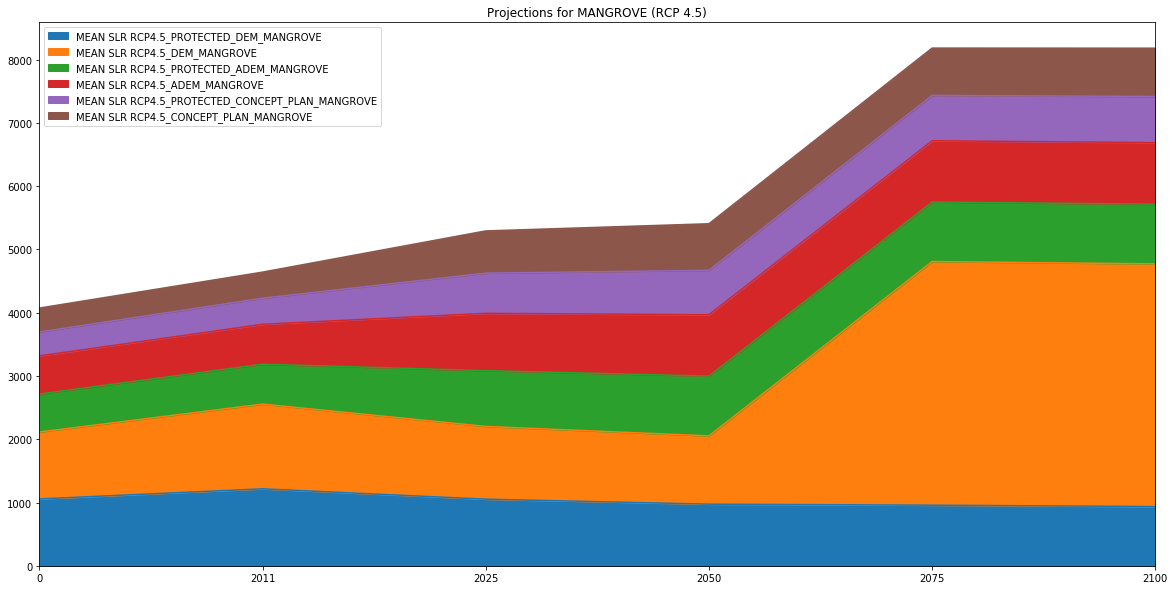

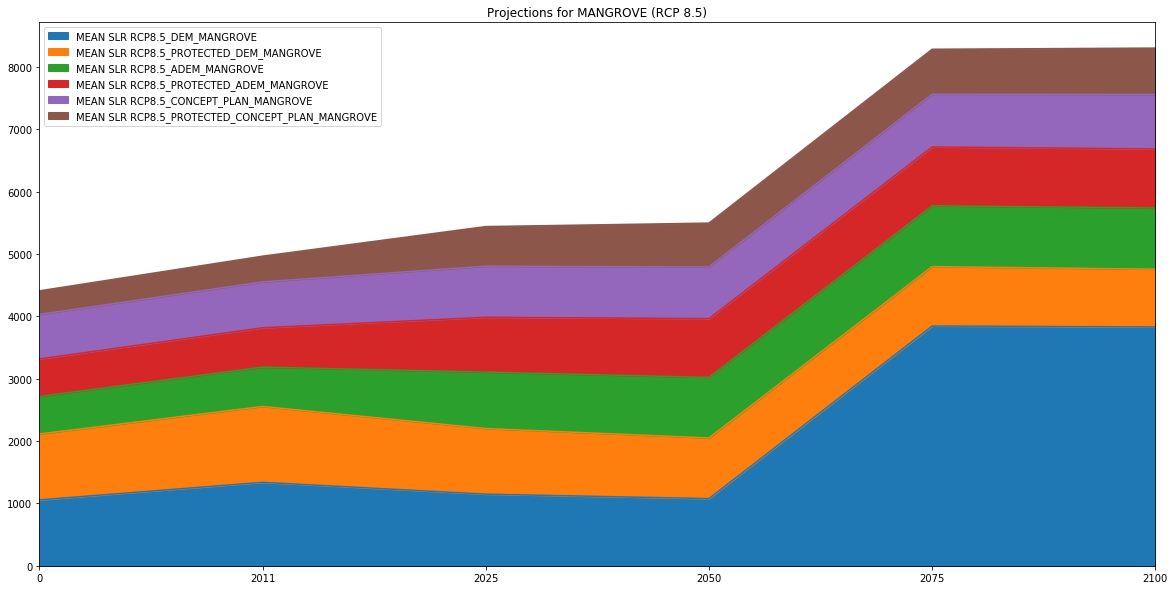

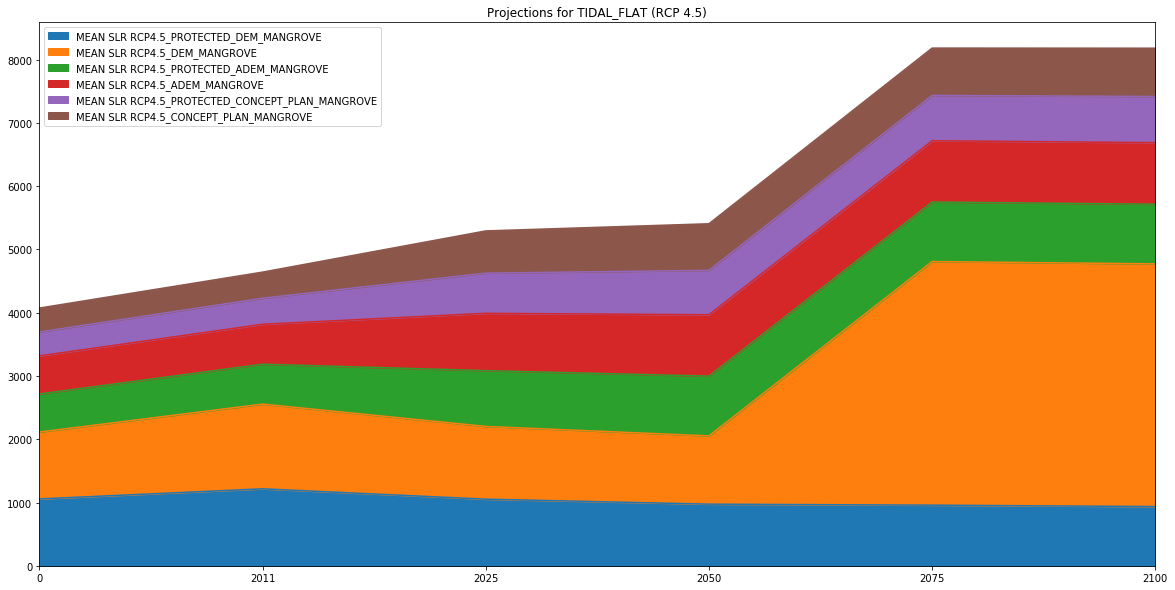

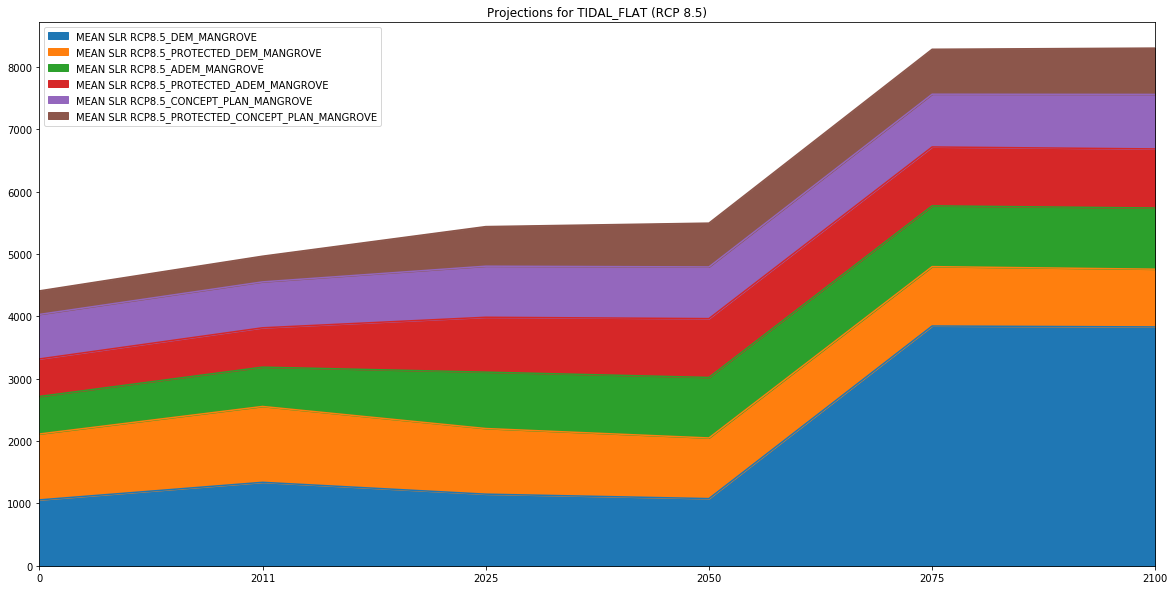

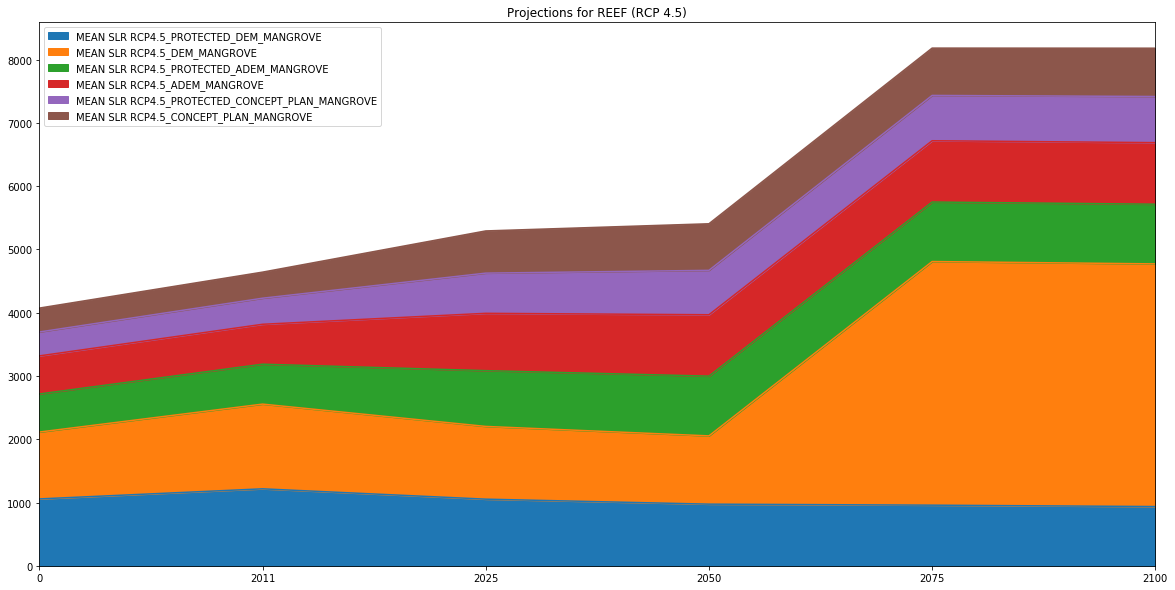

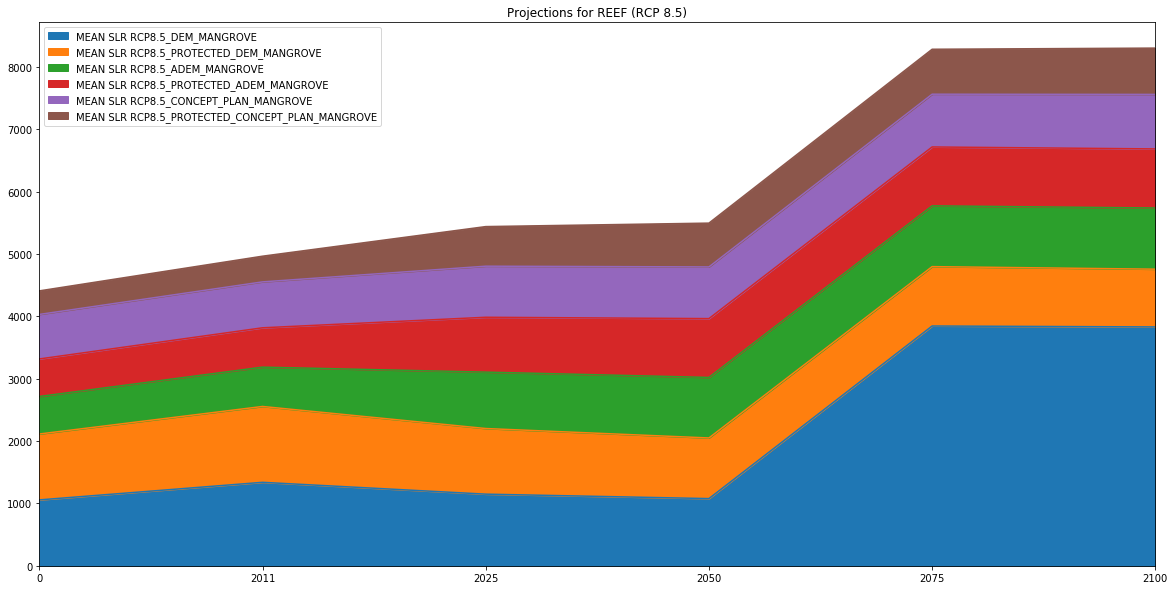

In [255]:
habitats = categories.keys()
for habitat in habitats:
    habitat_columns       = [col for col in df.columns if habitat in col]
    habitat_columns_rcp45 = [col for col in mangrove_columns if 'RCP4.5' in col]
    habitat_columns_rcp85 = [col for col in mangrove_columns if 'RCP8.5' in col]
    
    habitat_df = final_df[habitat_columns_rcp45]
    habitat_df.plot.area(figsize=(20,10))
    plt.title(f'Projections for {habitat} (RCP 4.5)')
    plt.xticks(range(6), [0, 2011, 2025, 2050, 2075, 2100])
    
    habitat_df = final_df[habitat_columns_rcp85]
    habitat_df.plot.area(figsize=(20,10))
    plt.title(f'Projections for {habitat} (RCP 8.5)')
    plt.xticks(range(6), [0, 2011, 2025, 2050, 2075, 2100])

